In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


train_df = pd.read_excel("C:\\Users\\shind\\JupiterWorking\\iNuron\\EDA\\Data Travel\\Data_Train.xlsx")
#test_df = pd.read_excel("C:\\Users\\shind\\JupiterWorking\\iNuron\\EDA\\Data Travel\\Test_set.xlsx")

#df = pd.concat([train_df,test_df])

df = train_df



In [50]:
# Problem statement is to predict the airfare
# Size of the Data
# View of the Data
# Datatypes 
# Check Missing Values
# how mathematically look like?
# Check if the duplicate Values
# Correlation between columns
# Graph Analysis(CountPlot,barplot,boxplot)

In [51]:
# Size of the Data
df.shape

(10682, 11)

In [52]:
# View of the Data
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [53]:
# Datatypes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [54]:
# Check Missing Values

df.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [55]:
routeMissingRow = df[df['Route'].isnull() == True].index
routeMissingRow

Int64Index([9038], dtype='int64')

In [56]:
df.drop(routeMissingRow,inplace=True)


In [57]:
# how mathematically look like?

df.describe()

,Price
count,10681.000000
mean,9086.443123
std,4611.075357
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [58]:
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<AxesSubplot:>

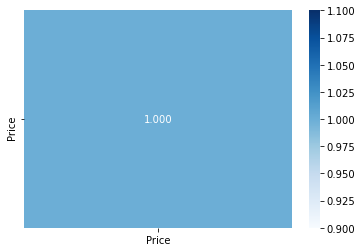

In [59]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [60]:
#counts/Unique

df['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [61]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [62]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [63]:
df['Destination'].replace(to_replace="New Delhi",value="Delhi",inplace=True)


In [64]:
df.columns

col1 = ['Airline','Source','Destination','Route','Duration','Additional_Info']

for i in col1:
    print(df[i].value_counts())
    print()
    print()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64


Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                  

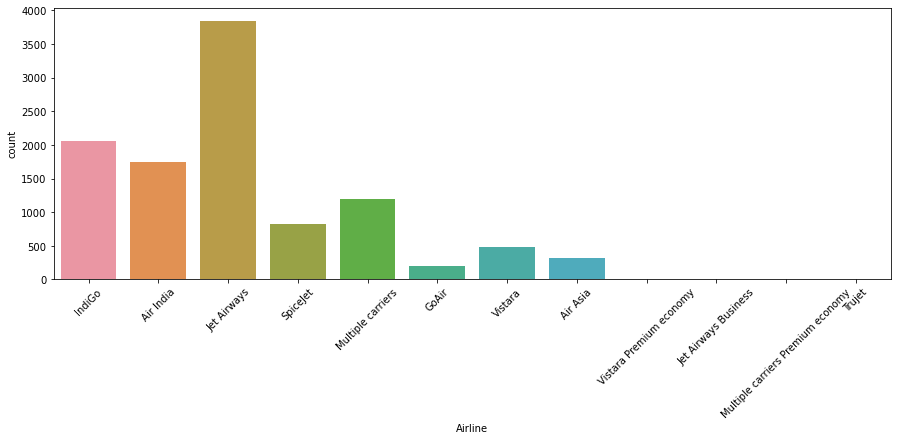

In [65]:
# Graph-Based Analysis
plt.figure(figsize=(15,5))
sns.countplot(x=df['Airline'])
plt.xticks(rotation=45) 
plt.show() 


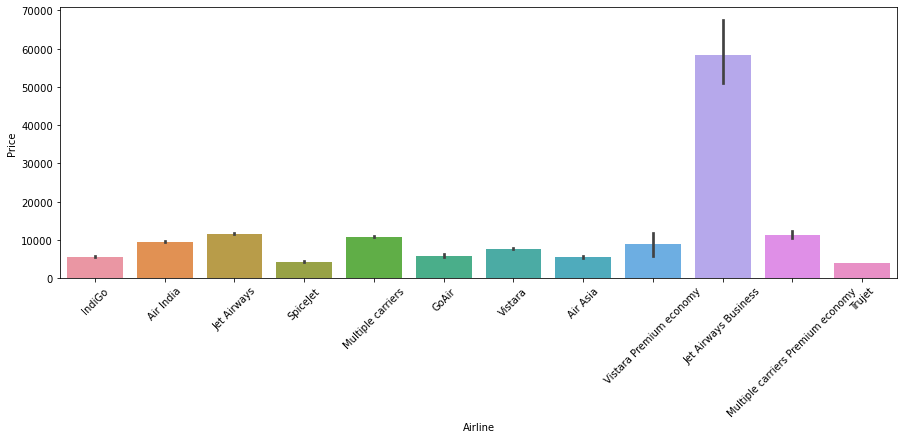

In [66]:
plt.figure(figsize=(15,5))

sns.barplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


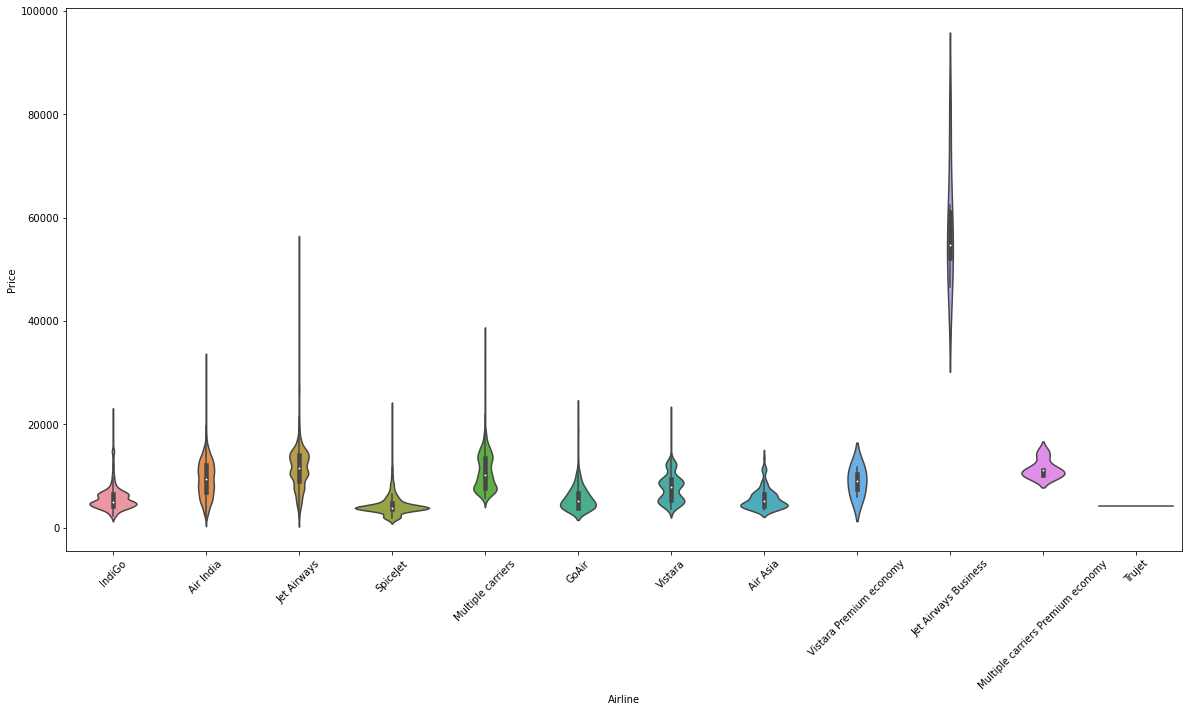

In [67]:

plt.figure(figsize=(20,10))
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Figure size 1440x360 with 0 Axes>

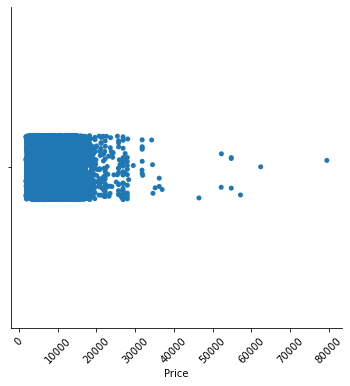

In [68]:
plt.figure(figsize=(20,5))
sns.catplot(data = df, x='Price')
plt.xticks(rotation=45) 
plt.show() 


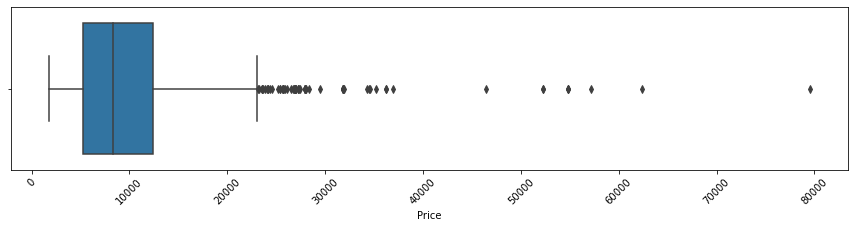

In [69]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 



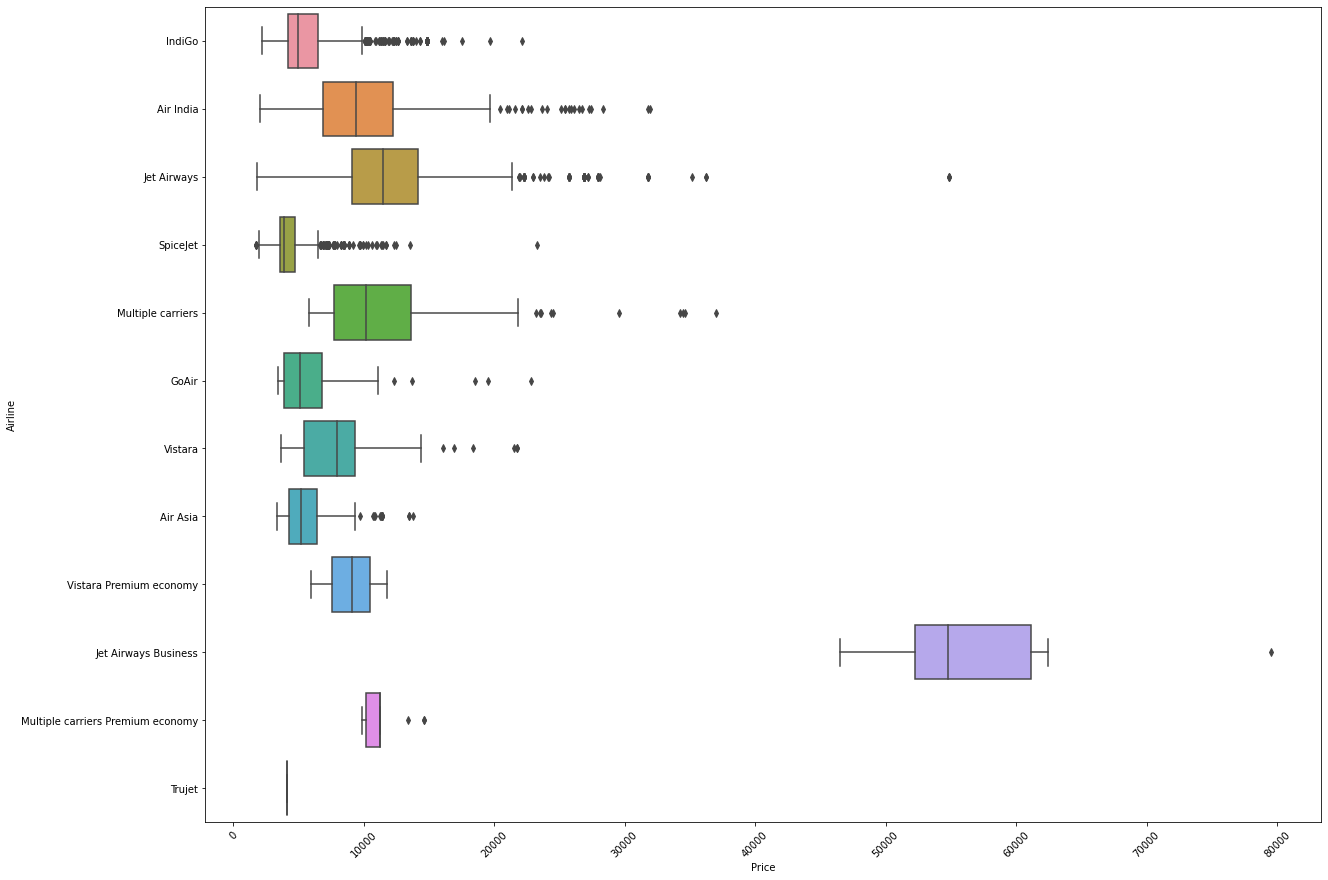

In [70]:
# Outlier Detection

plt.figure(figsize=(20,15))
sns.boxplot(y=df['Airline'],x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<AxesSubplot:xlabel='Price', ylabel='Density'>

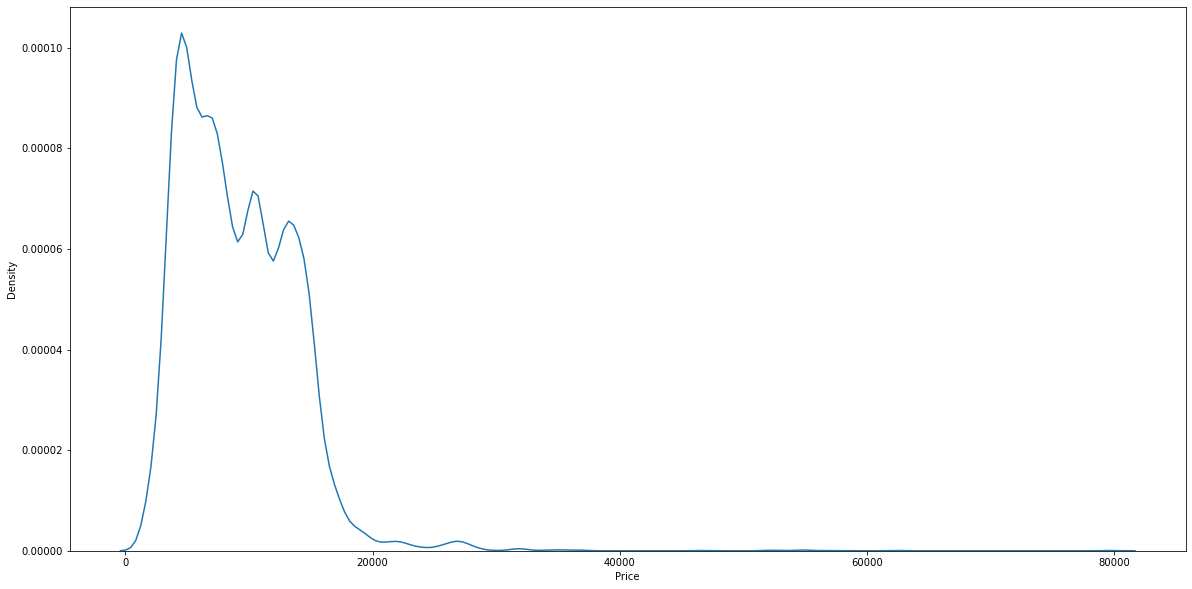

In [71]:

plt.figure(figsize=(20,10))
sns.kdeplot(x=df['Price'])


<AxesSubplot:xlabel='Price', ylabel='Count'>

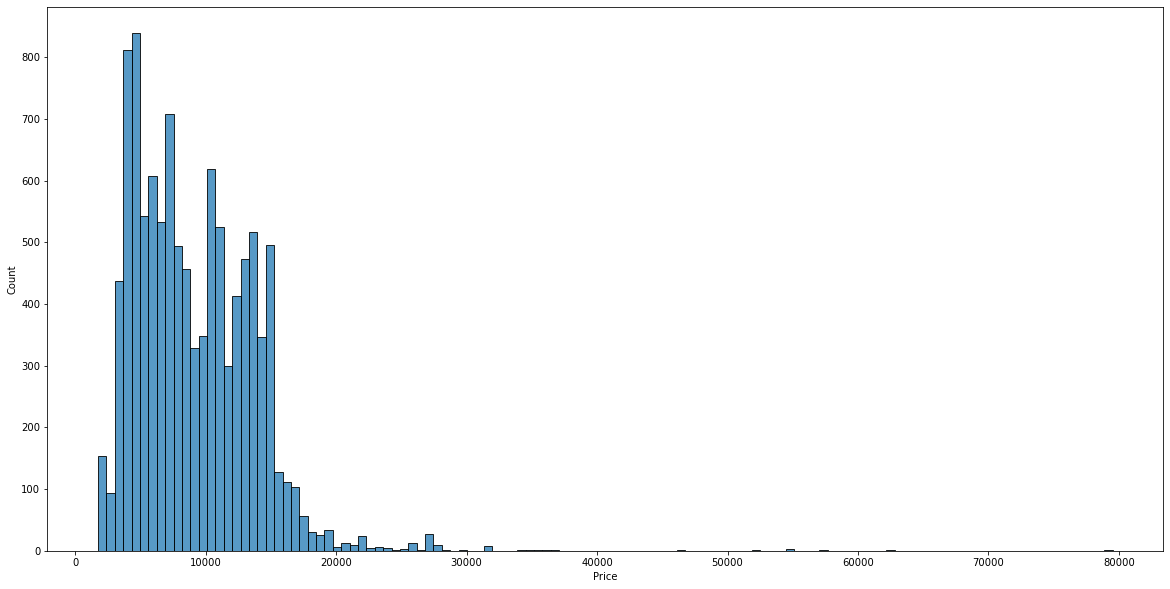

In [72]:
df['Airline']
plt.figure(figsize=(20,10))
sns.histplot(x=df['Price'])

In [93]:
df[df['Airline']=='Air India']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
12,Air India,24/06/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
18,Air India,12/06/2019,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2 stops,No info,13381
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,12/05/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10670,Air India,6/06/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10674,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145


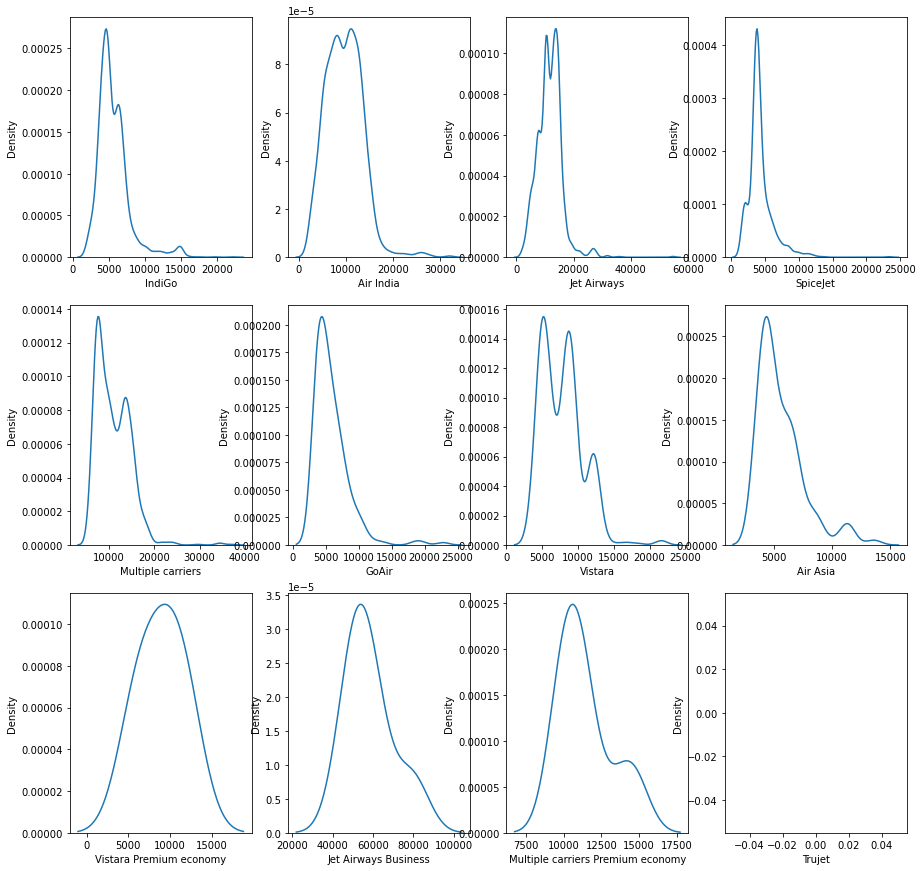

In [98]:
plt.figure(figsize=(15,15))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [94]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [87]:
list(enumerate(df['Airline'].unique()))

[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Vistara Premium economy'),
 (9, 'Jet Airways Business'),
 (10, 'Multiple carriers Premium economy'),
 (11, 'Trujet')]

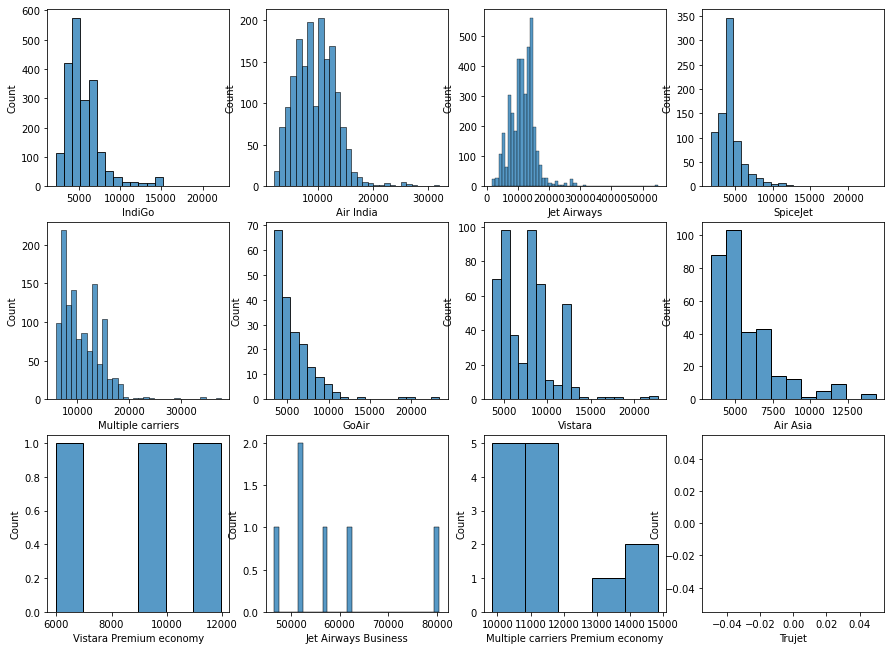

In [26]:
plt.figure(figsize=(15,15))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(4,4,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.histplot(x=indi['Price'],binwidth=1000)
    plt.xlabel(i[1]) 



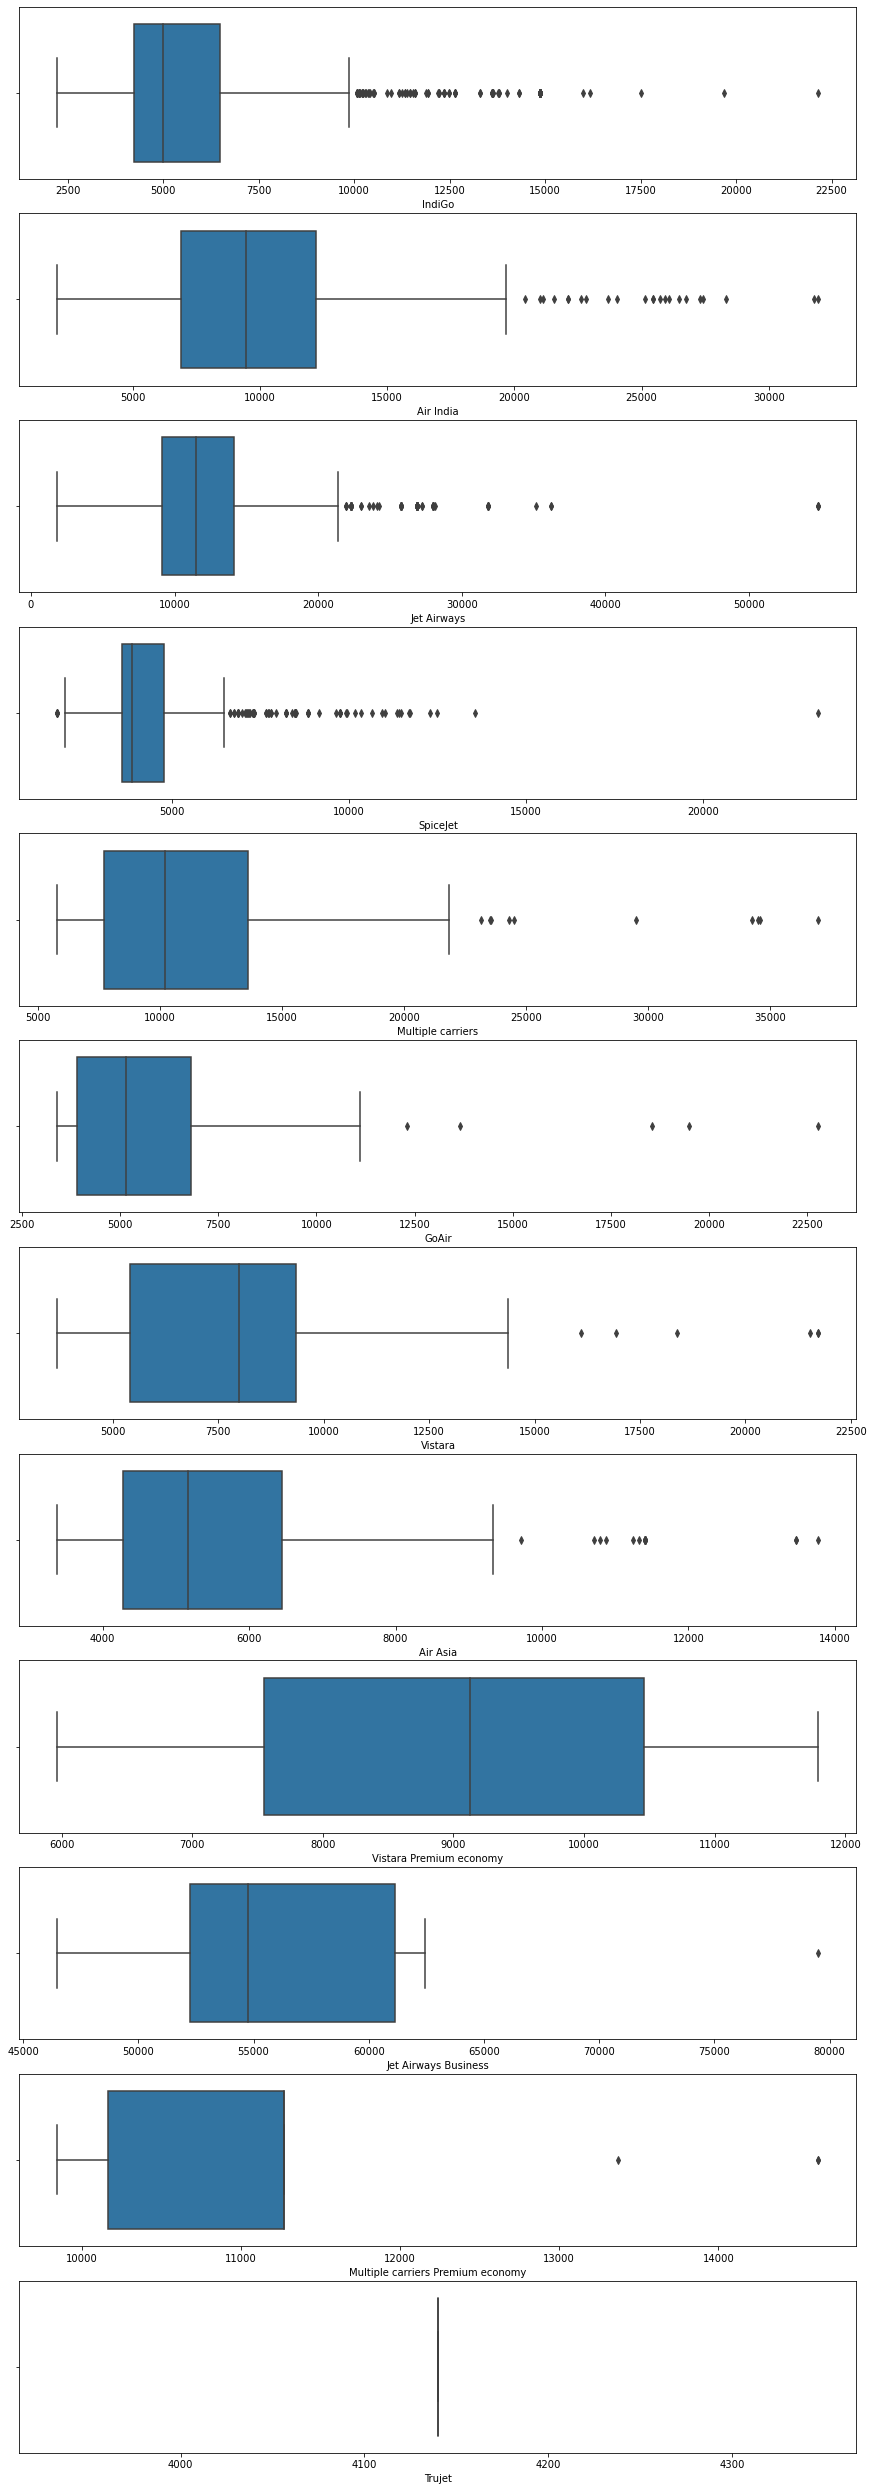

In [27]:
plt.figure(figsize=(15,45))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(12,1,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.boxplot(x=indi['Price'])
    plt.xlabel(i[1]) 



q1:  4226.0
q3:  6494.0
IQR 2268.0
lowerLimit:  824.0
upperLimit:  9896.0


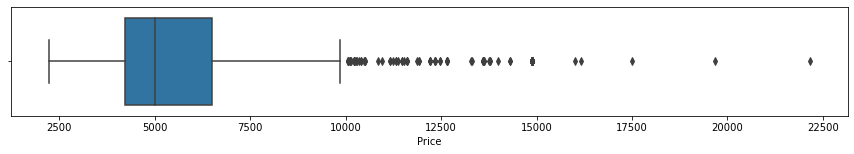

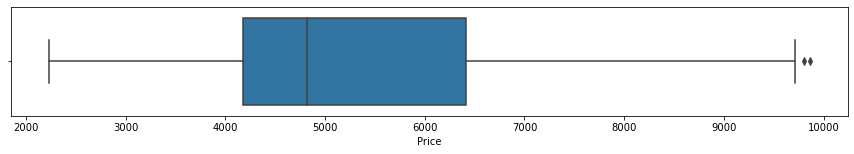

In [114]:
# Remove Outlier

airDataSet = df[df['Airline'] == 'IndiGo']

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(0.75)
print('q1: ',q1)
print('q3: ',q3)
IQR = q3-q1
print('IQR',IQR)

lowerLimit = q1-IQR*1.5
upperLimit = q3+IQR*1.5
print('lowerLimit: ',lowerLimit)
print('upperLimit: ',upperLimit)

lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index


airDataSet.drop(upperLimitIndex,axis=0,inplace=True)

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])
IndiGoDataSet = airDataSet

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
290,IndiGo,3/03/2019,Delhi,Cochin,DEL → BOM → COK,04:45,13:20,8h 35m,1 stop,No info,14871
313,IndiGo,3/03/2019,Delhi,Cochin,DEL → BOM → COK,09:10,21:00,11h 50m,1 stop,No info,14871
393,IndiGo,3/03/2019,Delhi,Cochin,DEL → BOM → COK,17:30,01:35 04 Mar,8h 5m,1 stop,No info,14871
647,IndiGo,6/03/2019,Delhi,Cochin,DEL → BOM → COK,08:25,21:00,12h 35m,1 stop,No info,14871
...,...,...,...,...,...,...,...,...,...,...,...
9820,IndiGo,9/03/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:35 10 Mar,10h 35m,1 stop,No info,13611
9827,IndiGo,27/03/2019,Delhi,Cochin,DEL → BOM → COK,09:10,15:30,6h 20m,1 stop,No info,10141
10001,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851
10128,IndiGo,03/03/2019,Banglore,Delhi,BLR → AMD → DEL,14:25,19:25,5h,1 stop,No info,11873


6961.0
12214.0
5253.0
-918.5
20093.5


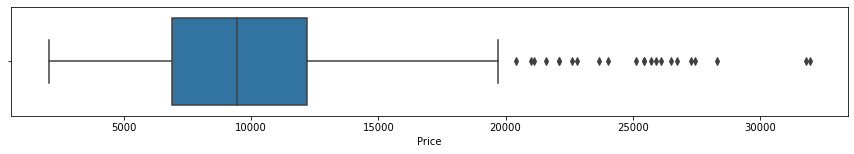

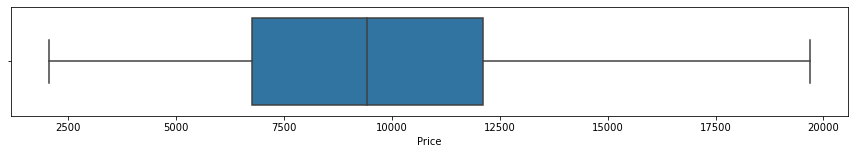

In [115]:
airDataSet = df[df['Airline']=='Air India']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.27)
q3 = airDataSet['Price'].quantile(0.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

AirIndiaDataSet = airDataSet

9564.0
14151.0
4587.0
2683.5
21031.5


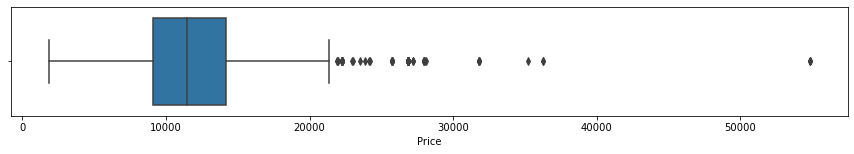

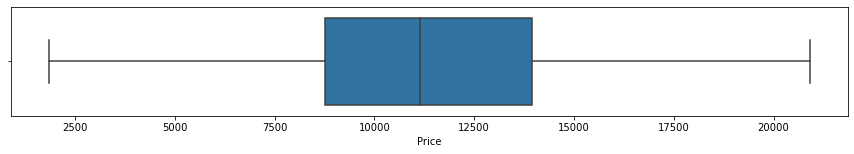

In [117]:
airDataSet = df[df['Airline']=='Jet Airways']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.27)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

JetAirwaysDataSet = airDataSet

3543.0
3925.0
382.0
2970.0
4498.0


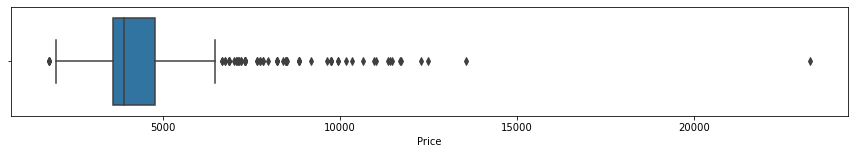

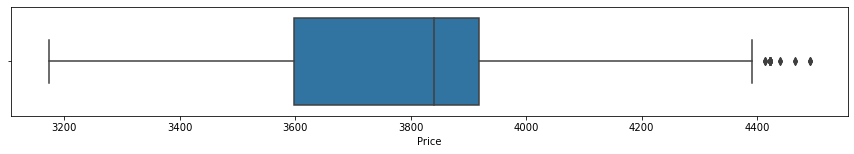

In [31]:
airDataSet = df[df['Airline']=='SpiceJet']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.60)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

SpiceJetDataSet = airDataSet



7485.0
13727.0
6242.0
-1878.0
23090.0


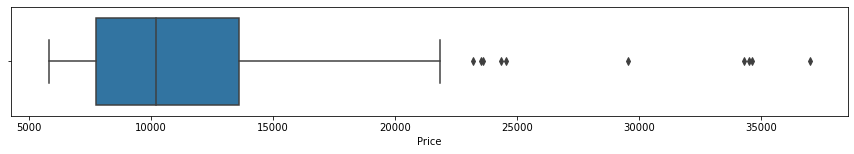

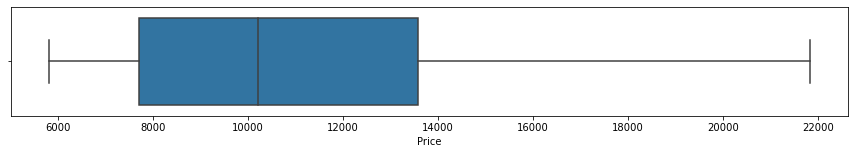

In [32]:
airDataSet = df[df['Airline']=='Multiple carriers']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.80)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

MultiplecarriersDataSet = airDataSet

3898.0
6811.25
2913.25
-471.875
11181.125


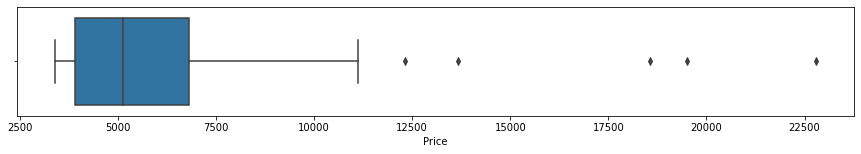

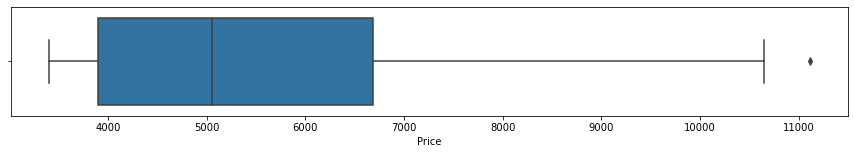

In [33]:
airDataSet = df[df['Airline']=='GoAir']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

GoAirDataSet = airDataSet

4878.0
9345.0
4467.0
-1822.5
16045.5


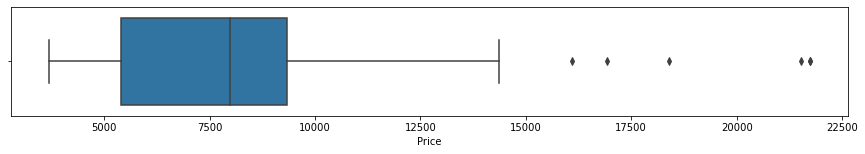

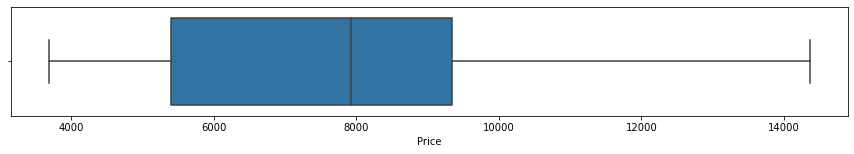

In [34]:
airDataSet = df[df['Airline']=='Vistara']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

VistaraDataSet = airDataSet

4282.0
6451.0
2169.0
1028.5
9704.5


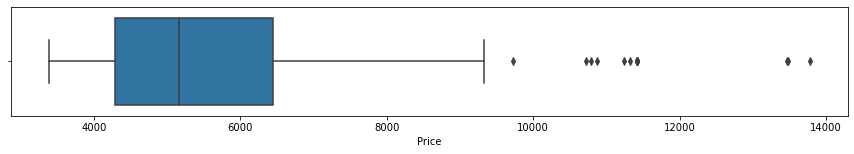

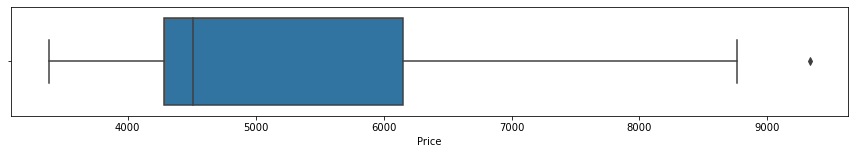

In [35]:
airDataSet = df[df['Airline']=='Air Asia']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

AirAsiaDataSet = airDataSet

7547.0
10459.0
2912.0
3179.0
14827.0


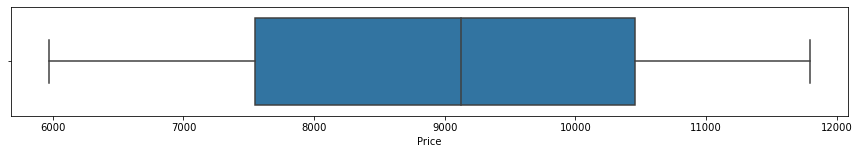

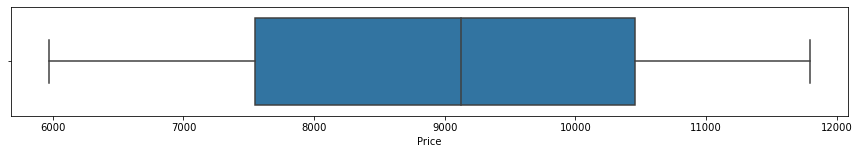

In [36]:
airDataSet = df[df['Airline']=='Vistara Premium economy']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

VistaraPremiumeconomyDataSet = airDataSet

52243.0
61122.5
8879.5
38923.75
74441.75


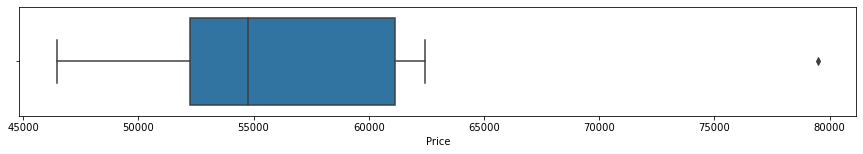

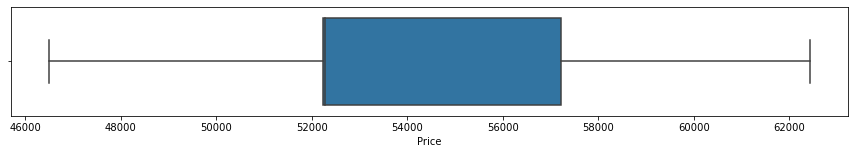

In [37]:
airDataSet = df[df['Airline']=='Jet Airways Business']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

JetAirwaysBusinessDataSet = airDataSet

9971.4
11269.0
1297.6000000000004
8024.999999999999
13215.400000000001


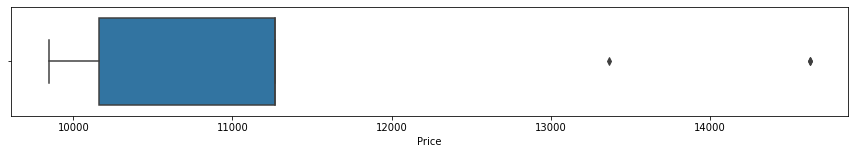

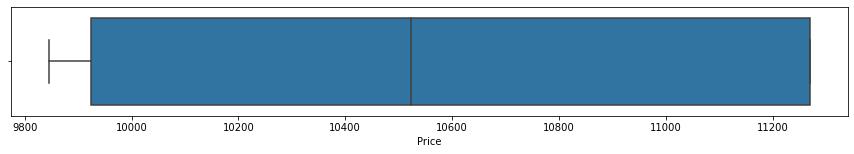

In [38]:
airDataSet = df[df['Airline']=='Multiple carriers Premium economy']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

MultiplecarriersPremiumeconomyDataSet = airDataSet

4140.0
4140.0
0.0
4140.0
4140.0


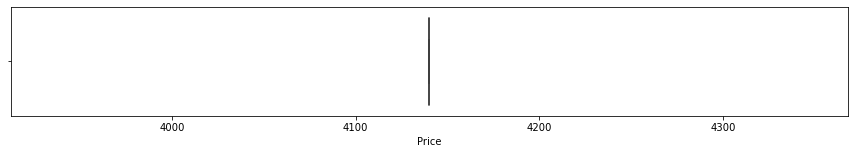

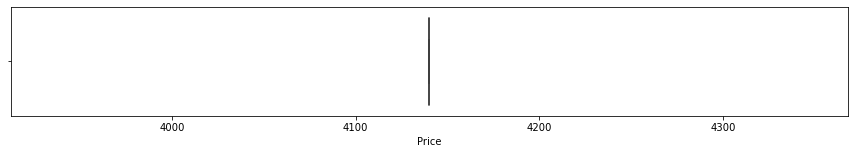

In [39]:
airDataSet = df[df['Airline']=='Trujet']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

TrujetDataSet = airDataSet

In [160]:
airlineList = [
IndiGoDataSet,
AirIndiaDataSet,
JetAirwaysDataSet,
SpiceJetDataSet,
MultiplecarriersDataSet,
GoAirDataSet,
VistaraDataSet,
AirAsiaDataSet,
VistaraPremiumeconomyDataSet,
JetAirwaysBusinessDataSet,
MultiplecarriersPremiumeconomyDataSet,
TrujetDataSet]

In [166]:
dfs = []
for i in airlineList:
    dfs.append(i)
dfs

final_df = pd.concat(dfs, axis=0, ignore_index=True)

final_df



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943
...,...,...,...,...,...,...,...,...,...,...,...
10083,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
10084,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269
10085,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885
10086,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269


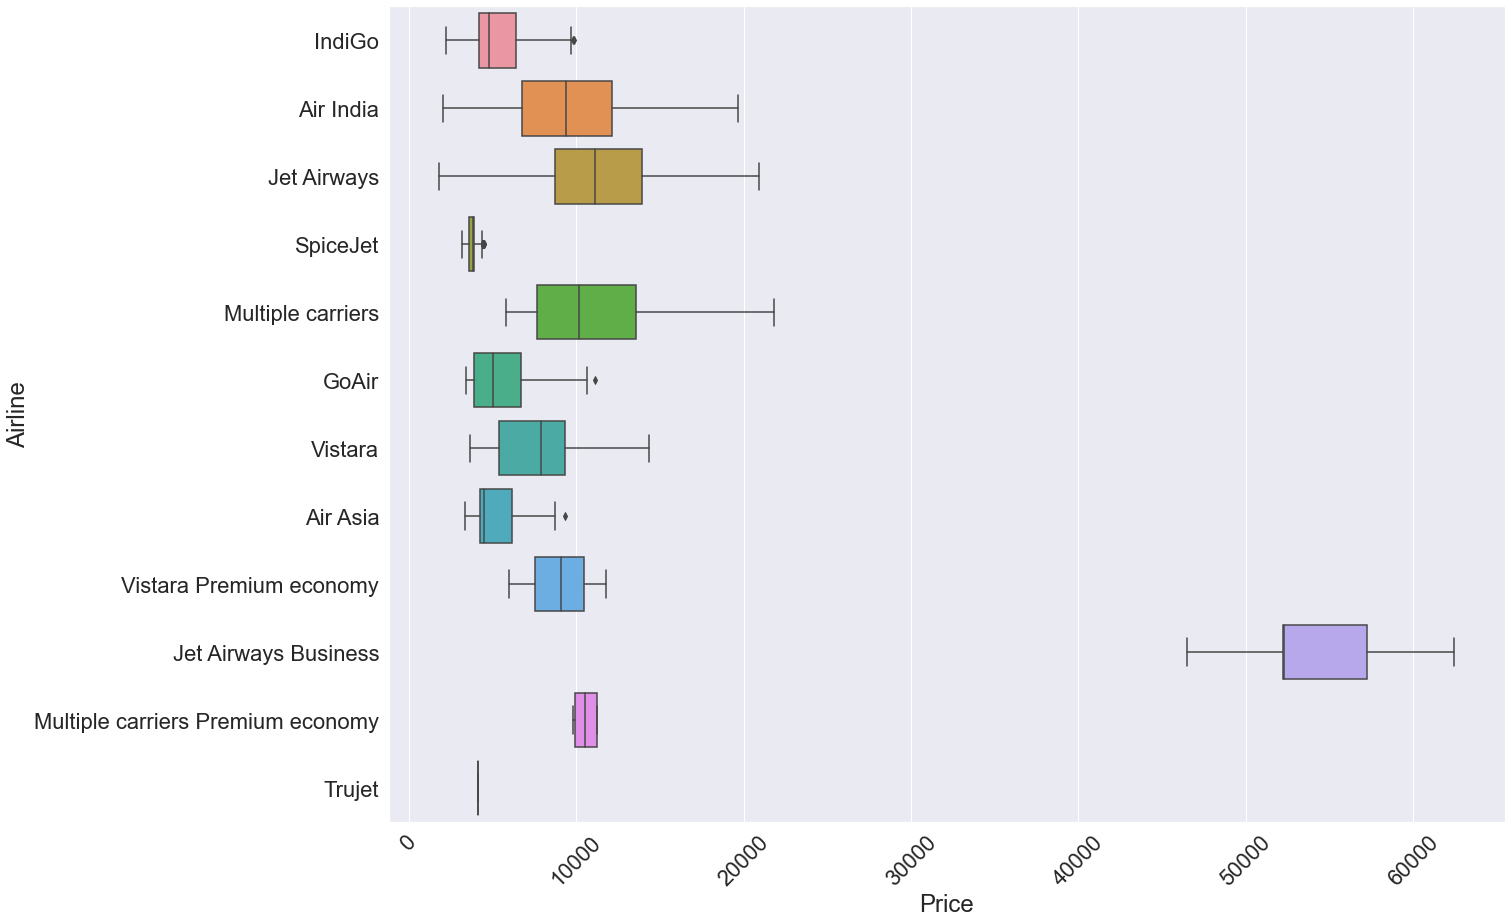

In [167]:
plt.figure(figsize=(20,15))
sns.boxplot(y=final_df['Airline'],x=final_df['Price'])
plt.xticks(rotation=45)
plt.show()


In [168]:
plt.figure(figsize=(15,15))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(4,4,i[0]+1)
    indi = final_df[final_df['Airline']==final_df['Airline'].unique()[i[0]]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



KeyError: 'Airline'

<Figure size 1080x1080 with 0 Axes>

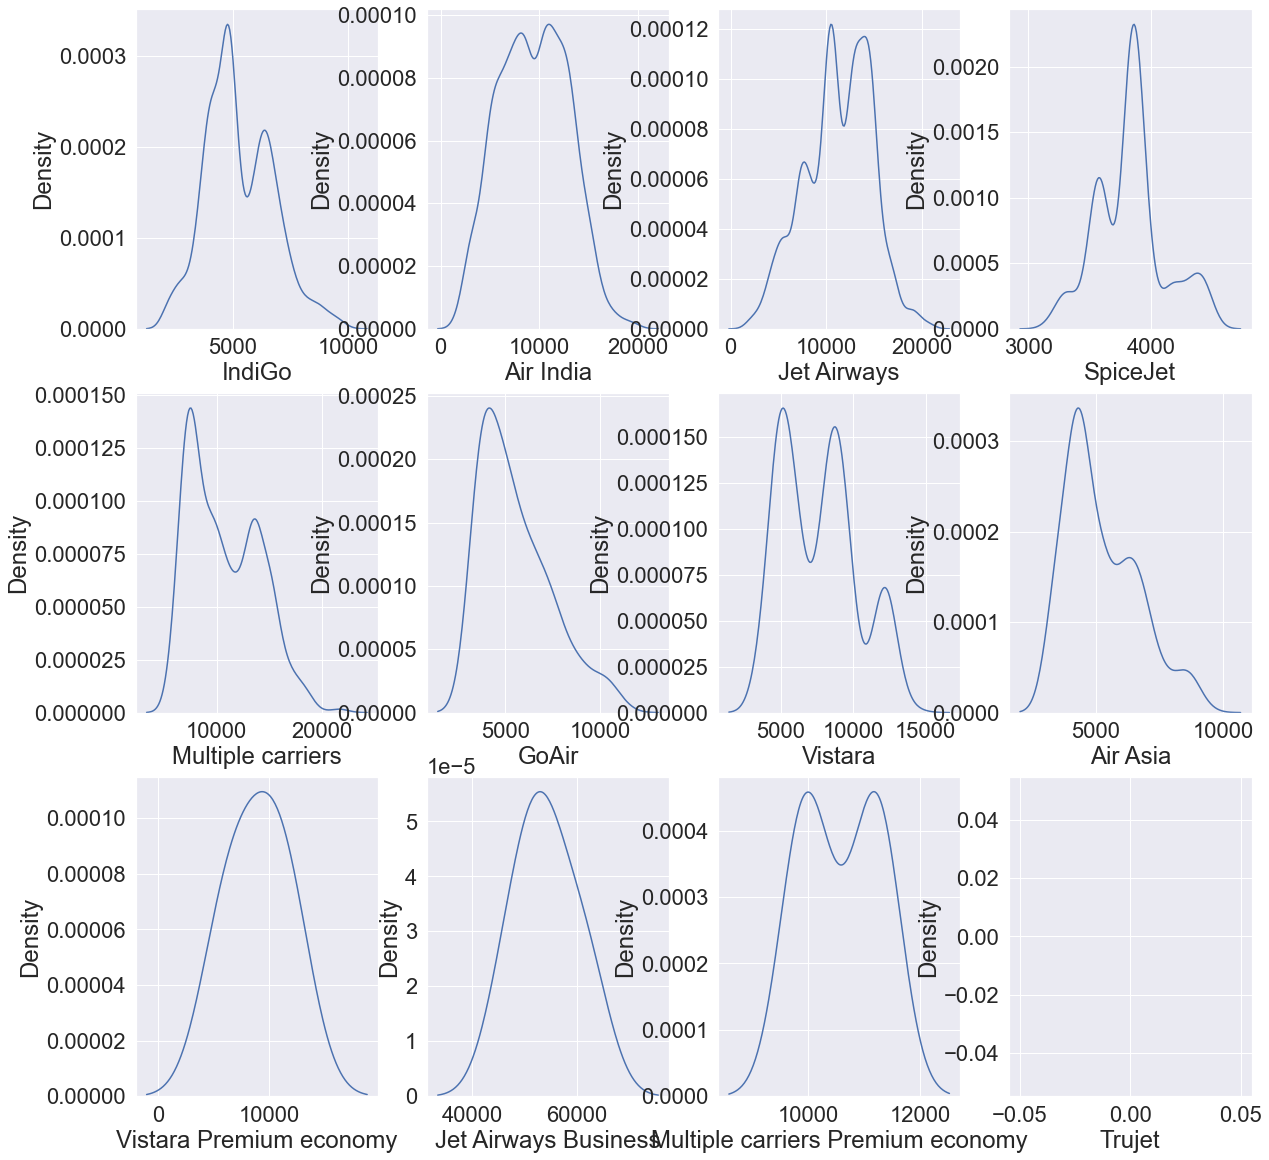

In [173]:
plt.figure(figsize=(20,20))

for i in list(enumerate(final_df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = final_df[final_df['Airline']==final_df['Airline'].unique()[i[0]]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [123]:
df = final_df
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943
...,...,...,...,...,...,...,...,...,...,...,...
10083,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
10084,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269
10085,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885
10086,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269


In [124]:
df['Day'] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df['Month'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df['Year'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.year
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019


In [125]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

df['Dept_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute
df['Arr_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute



In [126]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time



In [127]:
range(len(df['Duration']))

range(0, 10088)

In [128]:
df["hoursMinutes"] = 0
for i in range(len(df['Duration'])):
    if " " in df.loc[i,'Duration']:
        column1 = df.loc[i,'Duration'].split(" ")[0]
        column2 = df.loc[i,'Duration'].split(" ")[1]
        
        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        if "h" in column2:
            column2 =  (int(column2.replace("h",""))*60)
        elif "m" in column2:
            column2 =  (int(column2.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1 + column2 

    else:
        column1 = df.loc[i,'Duration']

        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1

        
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,325
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019,20,20,22,55,155
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804,24,4,2019,17,15,19,50,155
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943,3,4,2019,4,0,6,50,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845,21,3,2019,8,55,21,0,725
10084,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269,21,3,2019,8,55,15,30,395
10085,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885,21,3,2019,19,0,1,35,395
10086,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269,21,3,2019,7,30,15,30,480


In [129]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,325


In [130]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [131]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,0


In [132]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()



,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0


In [133]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)



In [134]:
df.drop(["Arrival_Time","Arrival_Time","Date_of_Journey","Route","Airline","Duration","Source","Destination","Additional_Info"], axis = 1, inplace = True)

In [135]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([df, Airline, Source, Destination], axis = 1)



In [136]:
data_train.columns

Index(['Dep_Time', 'Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dept_Hour',
       'Dept_Minute', 'Arr_Hour', 'Arr_Minute', 'hoursMinutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [137]:
data_train = data_train[['Total_Stops', 'Day', 'Month',
       'Year', 'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute',
       'hoursMinutes', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_Delhi','Price']]


In [138]:
data_train



,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Delhi,Price
0,0,24,3,2019,22,20,1,10,170,0,...,0,0,0,0,0,1,0,0,1,3897
1,1,12,5,2019,18,5,23,30,325,0,...,0,0,1,0,0,0,0,0,0,6218
2,0,18,4,2019,20,20,22,55,155,0,...,0,0,1,0,0,0,0,0,0,4174
3,0,24,4,2019,17,15,19,50,155,0,...,0,0,1,0,0,0,0,0,0,4804
4,0,3,4,2019,4,0,6,50,170,0,...,0,0,0,0,0,1,0,0,1,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,1,21,3,2019,8,55,21,0,725,0,...,0,1,0,0,1,0,0,0,0,9845
10084,1,21,3,2019,8,55,15,30,395,0,...,0,1,0,0,1,0,0,0,0,11269
10085,1,21,3,2019,19,0,1,35,395,0,...,0,1,0,0,1,0,0,0,0,10885
10086,1,21,3,2019,7,30,15,30,480,0,...,0,1,0,0,1,0,0,0,0,11269


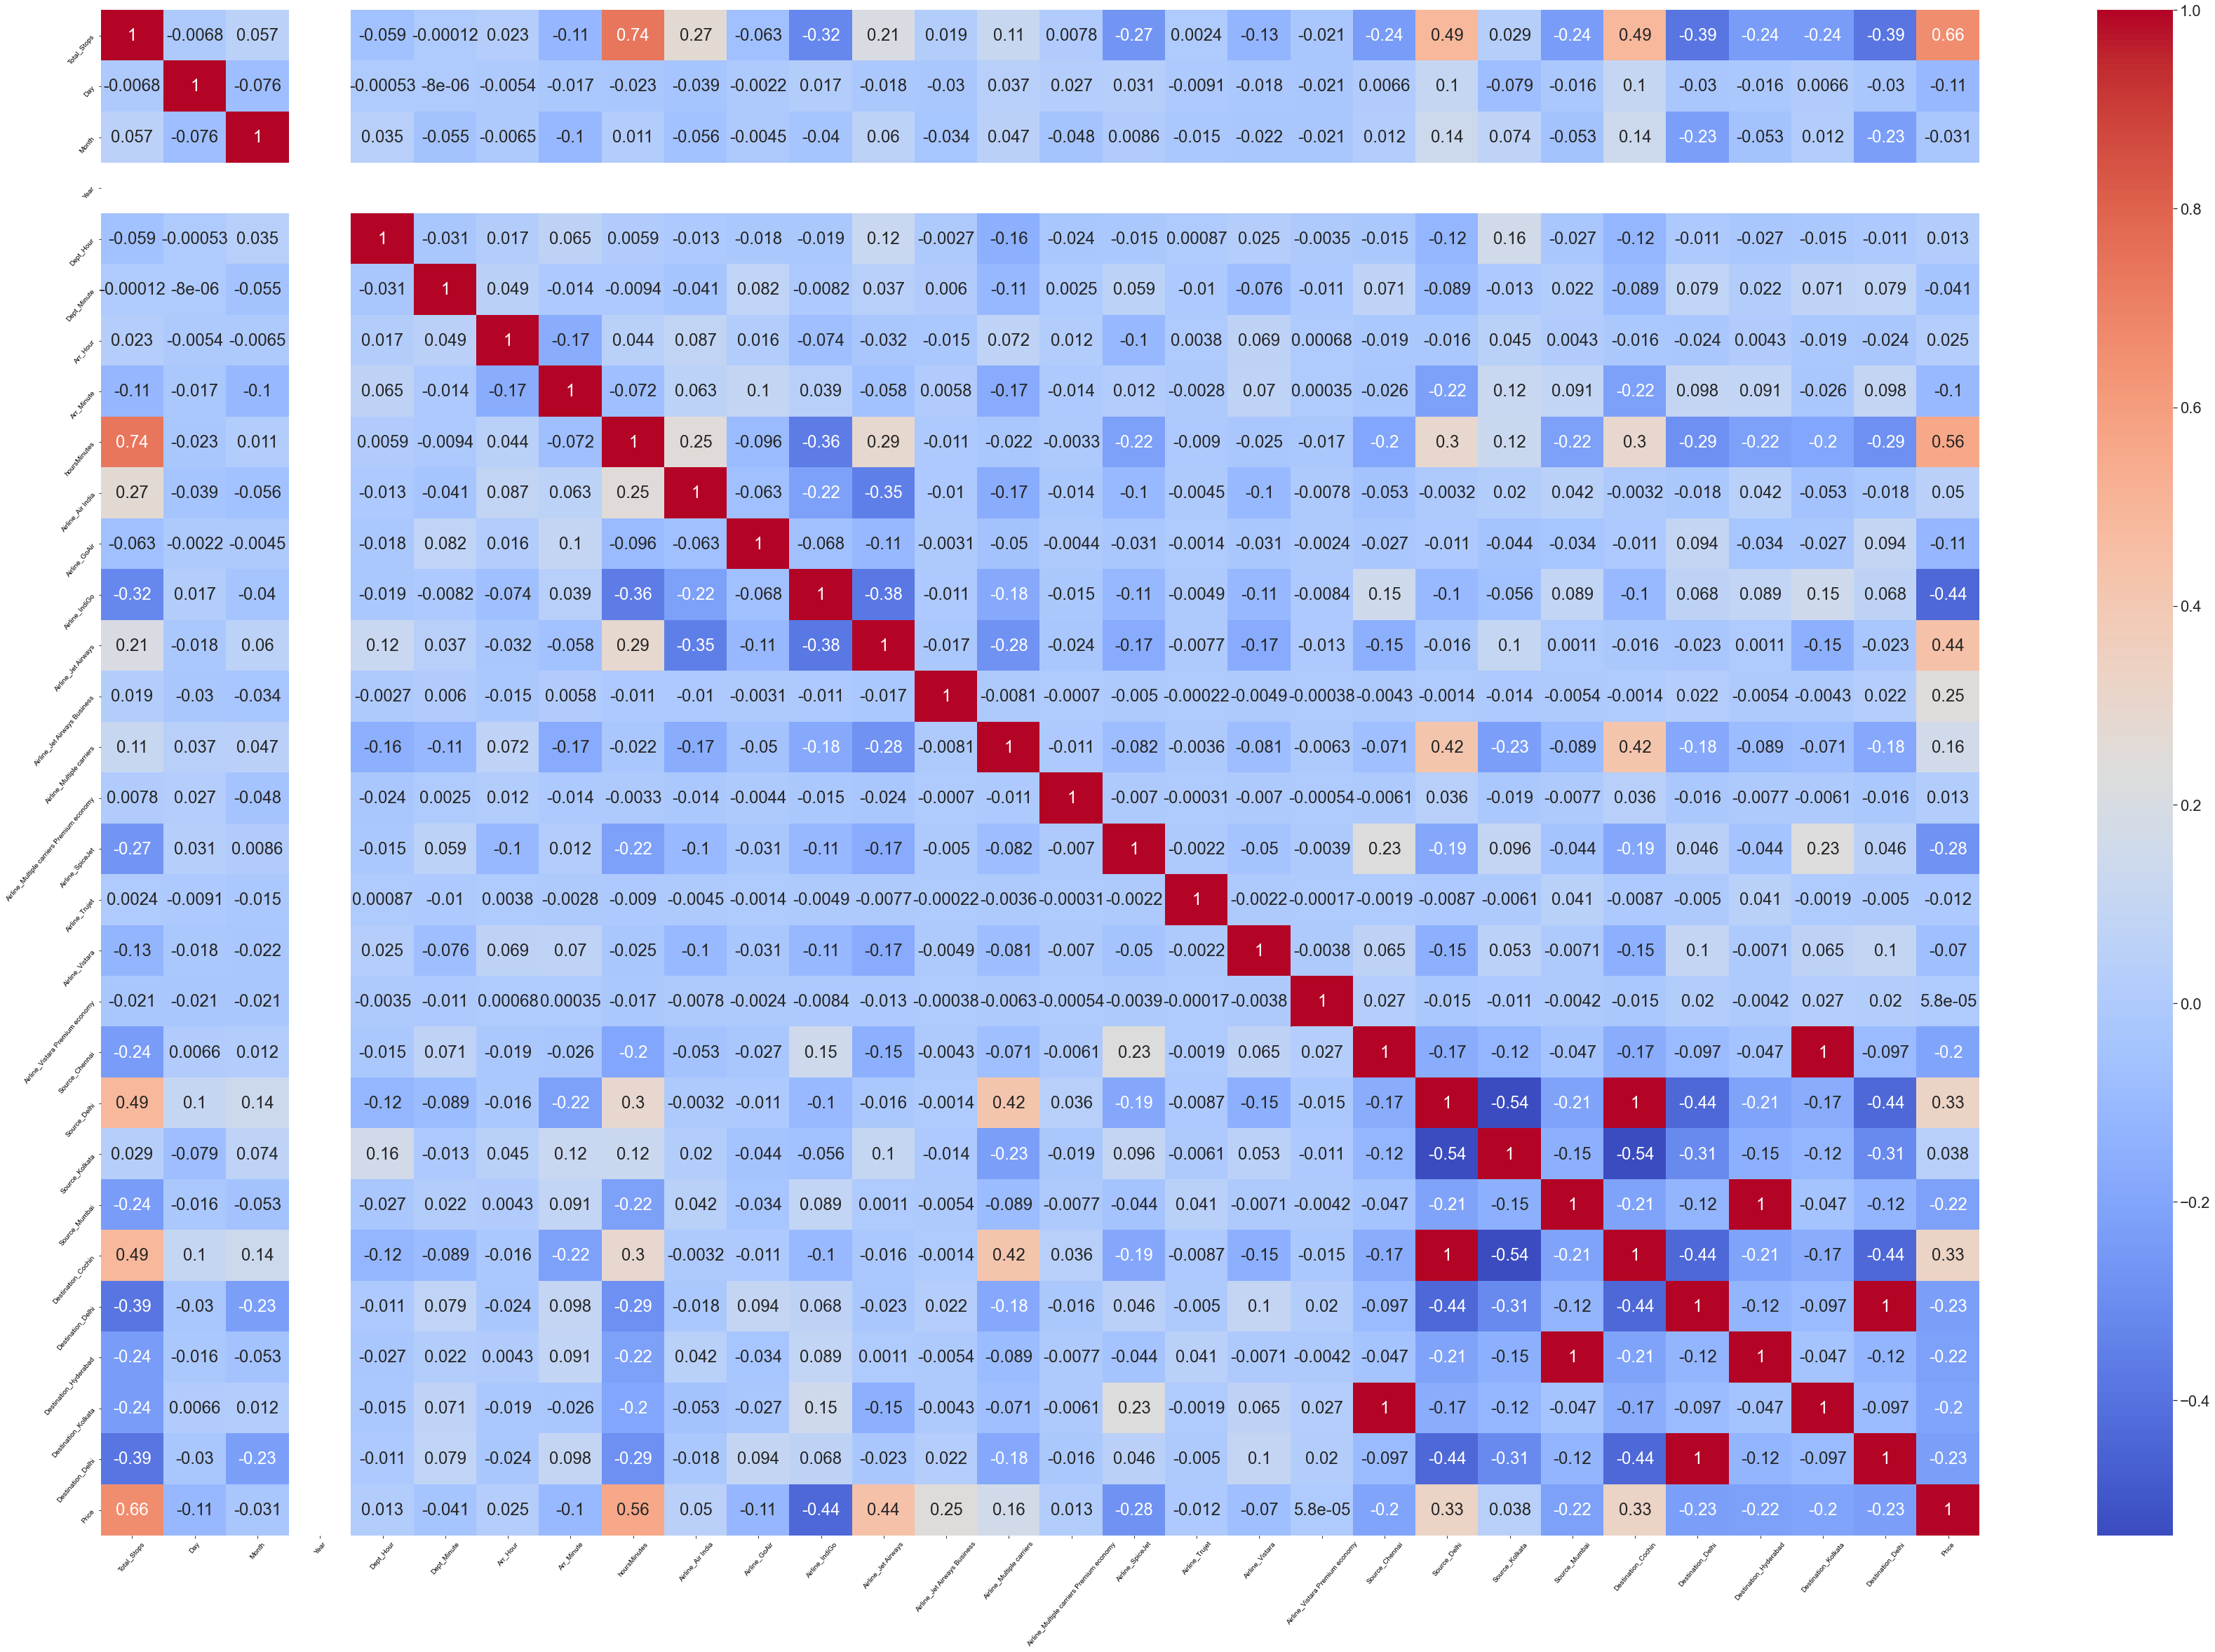

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(60,40)) 
sns.set(font_scale=2)
corr_matrix = data_train.corr()

yr = sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',ax=ax)
yr.set_xticklabels(yr.get_xticklabels(),rotation=50)
yr.set_yticklabels(yr.get_yticklabels(),rotation=50)


plt.show()




In [140]:
# target Feature
y = data_train['Price']
y.head()

0    3897
1    6218
2    4174
3    4804
4    3943
Name: Price, dtype: int64

In [141]:
# independat Feature
X = data_train.drop(['Price'],axis=1)
X


,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Delhi
0,0,24,3,2019,22,20,1,10,170,0,...,0,0,0,0,0,0,1,0,0,1
1,1,12,5,2019,18,5,23,30,325,0,...,0,0,0,1,0,0,0,0,0,0
2,0,18,4,2019,20,20,22,55,155,0,...,0,0,0,1,0,0,0,0,0,0
3,0,24,4,2019,17,15,19,50,155,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,4,2019,4,0,6,50,170,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,1,21,3,2019,8,55,21,0,725,0,...,0,0,1,0,0,1,0,0,0,0
10084,1,21,3,2019,8,55,15,30,395,0,...,0,0,1,0,0,1,0,0,0,0
10085,1,21,3,2019,19,0,1,35,395,0,...,0,0,1,0,0,1,0,0,0,0
10086,1,21,3,2019,7,30,15,30,480,0,...,0,0,1,0,0,1,0,0,0,0


In [142]:
'''#ExtraTreeRegressor is used to check the feature importance, reature selection.
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)
'''

'#ExtraTreeRegressor is used to check the feature importance, reature selection.\nfrom sklearn.ensemble import ExtraTreesRegressor\nselection = ExtraTreesRegressor()\nselection.fit(X,y)\n'

In [143]:
'''from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)
'''

'from sklearn.ensemble import ExtraTreesRegressor\nselection = ExtraTreesRegressor()\nselection.fit(X,y)\n'

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Delhi
1197,0,18,5,2019,18,25,21,20,175,0,...,0,0,0,0,0,0,1,0,0,1
8514,1,18,5,2019,4,55,12,35,460,0,...,0,0,1,0,0,1,0,0,0,0
7756,0,24,3,2019,9,35,12,30,175,0,...,0,0,0,0,0,0,1,0,0,1
3080,1,27,3,2019,20,40,9,25,765,1,...,0,0,1,0,0,1,0,0,0,0
6473,1,6,3,2019,11,40,11,25,1425,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2,9,4,2019,9,25,4,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
5191,0,9,4,2019,7,10,10,10,180,0,...,0,0,0,0,0,0,1,0,0,1
5390,1,12,3,2019,18,55,19,10,1455,0,...,0,0,0,0,0,0,1,0,0,1
860,0,18,4,2019,21,25,0,5,160,0,...,0,0,0,1,0,0,0,0,0,0


In [145]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_train'

In [146]:
'''from sklearn.preprocessing import MinMaxScaler

minMaxscaler = MinMaxScaler()
X_train = minMaxscaler.fit_transform(X_train)
X_train'''

'from sklearn.preprocessing import MinMaxScaler\n\nminMaxscaler = MinMaxScaler()\nX_train = minMaxscaler.fit_transform(X_train)\nX_train'

In [147]:
from sklearn.ensemble import RandomForestRegressor
modelRandForestRegressor = RandomForestRegressor()
modelRandForestRegressor.fit(X_train,y_train)


RandomForestRegressor()

In [148]:
modelRandForestRegressor.score(X_train,y_train)

0.94834484879164

In [149]:
y_pred = modelRandForestRegressor.predict(X_test)
y_pred

array([ 3905.6       ,  7522.97633333,  8730.02      , ...,
       12939.66416667, 11328.441     , 14376.32      ])

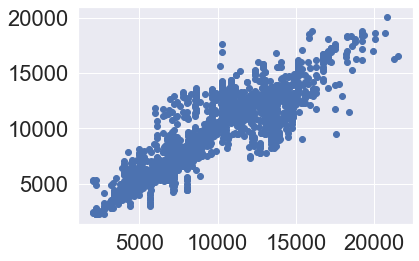

In [150]:

plt.scatter(y_test,y_pred)


In [151]:
modelRandForestRegressor.score(X_test,y_test)


0.8152530682044925

In [152]:
residuals = (y_test-y_pred)
residuals

9939    -522.600000
568      125.023667
8264    1545.980000
2344    -142.660000
5708    -174.532500
           ...     
4222    -641.810000
4264     349.408667
6608    1841.335833
7333   -1066.441000
8261     471.680000
Name: Price, Length: 2018, dtype: float64

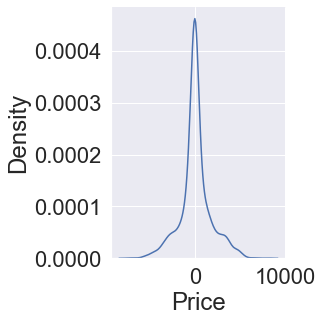

In [153]:
sns.displot(residuals,kind='kde')

In [154]:
from sklearn.ensemble import RandomForestRegressor
modelRandForestRegressor = RandomForestRegressor()
modelRandForestRegressor.fit(X_train,y_train)


RandomForestRegressor()

In [155]:
import numpy as np
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 1126.7398364233088
MSE: 2969476.969392971
RMSE: 1723.2170407098959


In [156]:
from sklearn.metrics import r2_score

score = metrics.r2_score(y_test,y_pred)
score

0.8152530682044925

In [157]:
## Adjusted R square
#display adjusted R-squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.812558067690373

In [158]:
import pickle
file = open('flight_rf.pkl','wb')
pickle.dump(modelRandForestRegressor,file)

In [159]:
model = open('flight_rf.pkl','rb')
modelRandForest = pickle.load(model)